### Calculate neutral density in OM4 output

In [83]:
import xarray as xr
import numpy as np
from pygamma import gamma_n
import gsw
import wmt_bgc.basic as wmt
import matplotlib.pyplot as plt
from numba import jit

In [84]:
# Load the data
# (from restart)
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_annual_z'
localdir = '/ts/annual/5yr/'
filename = pp+'.201*.nc'
ds = xr.open_mfdataset(rootdir+pp+localdir+filename)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc')

In [85]:
dsnow = ds.transpose('xh','yh','z_l','time','nv','xq','yq','z_i').isel(time=0)
gridnow = grid

s = dsnow['so'].values
t = dsnow['thetao'].values
p = wmt.gsw_p_from_z(-1*dsnow['z_l'],gridnow['geolat']).transpose('xh','yh','z_l').values
lon = gridnow['geolon'].where(gridnow['geolon']>0,gridnow['geolon']+360).transpose('xh','yh').values
lat = gridnow['geolat'].transpose('xh','yh').values

In [96]:
def _calc_gamma(s,t,p,lon,lat):
    gamma = np.zeros(shape=s.shape)
    for j in range(len(s[0,:,0])):
        if np.mod(j,100)==0:
            print(j)
        gamma[:,j,:],dg_hi,dg_lo = gamma_n(s[:,j,:],t[:,j,:],p[:,j,:],lon[:,j],lat[:,j])
    return gamma

In [97]:
%time gamma = _calc_gamma(s,t,p,lon,lat)

0
100
200
300
400
500
600
700
800
900
1000
CPU times: user 14min 21s, sys: 4.58 s, total: 14min 26s
Wall time: 14min 45s


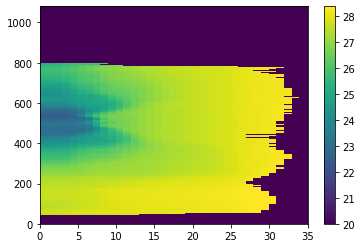

In [100]:
im = plt.pcolormesh(gamma[600,:,:],vmin=20)
plt.colorbar(im)

In [20]:
def xr_gamma(s,t,p,lon,lat):
    return xr.apply_ufunc(pygamma.gamma_n,
                         s,t,p,lon,lat,
                         dask='parallelized',output_dtypes=[s.dtype])

In [73]:
np.ufunc()

(1440, 1080, 35)